In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns

In [2]:
df = pd.read_excel("Data_Train.xlsx")
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [4]:
# checking data by columns and rows.
df.head(1)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897


In [5]:
#lets change to this format of this columns of "Date_of_Journey" to convert this columns in numeric data
df['Date_of_Journey']=pd.to_datetime(df['Date_of_Journey'])
df.head(2)
# here we can check this columns of "Date_of_Journey" that this columns are converted in datetime format.

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662


In [6]:
df['year']=df['Date_of_Journey'].apply(lambda df: df.year)
df['month']=df['Date_of_Journey'].apply(lambda df: df.month)
df['day']=df['Date_of_Journey'].apply(lambda df: df.day)
df.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,year,month,day
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,2019,3,24
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,2019,1,5


In [7]:
# DROP THIS COLUMNS.
df.drop(["Date_of_Journey"],axis=1,inplace=True)
df.head(2)

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,year,month,day
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,2019,3,24
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,2019,1,5


In [8]:
df['Arrival_Time']=df['Arrival_Time'].str.split(' ').str[0]
df['Arrival_Hour']=df['Arrival_Time'].str.split(':').str[0].astype(int)
df['Arrival_minute']=df['Arrival_Time'].str.split(':').str[1].astype(int)
#dropping the columns of "Arrival_Time"
df.drop(["Arrival_Time"],axis=1,inplace=True)
df.head(2)

,Airline,Source,Destination,Route,Dep_Time,Duration,Total_Stops,Additional_Info,Price,year,month,day,Arrival_Hour,Arrival_minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,2h 50m,non-stop,No info,3897,2019,3,24,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,7h 25m,2 stops,No info,7662,2019,1,5,13,15


In [9]:
df['Dep_Time']=df['Dep_Time'].str.split(' ').str[0]
df['Dep_Hour']=df['Dep_Time'].str.split(':').str[0].astype(int)
df['Dep_minute']=df['Dep_Time'].str.split(':').str[1].astype(int)
#dropping the columns of "Dep_Time"
df.drop(["Dep_Time"],axis=1,inplace=True)
df.head(2)

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,year,month,day,Arrival_Hour,Arrival_minute,Dep_Hour,Dep_minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,2019,3,24,1,10,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,2019,1,5,13,15,5,50


In [10]:
df.drop(["year"],axis=1,inplace=True)
df.head(2)

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,month,day,Arrival_Hour,Arrival_minute,Dep_Hour,Dep_minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,3,24,1,10,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,13,15,5,50


In [11]:
# here we are checking nan values in our respected columns.one by one.
df['Total_Stops'].unique()
# we found nan values in our data in columns of "Total_Stops"

array(['non-stop', '2 stops', '1 stop', '3 stops', nan, '4 stops'],
      dtype=object)

In [12]:
df['Total_Stops'].isnull().sum()

1

In [13]:
#here we can see proper null value in our data on indexing number 9039.
df[df["Total_Stops"].isnull()==True]

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,month,day,Arrival_Hour,Arrival_minute,Dep_Hour,Dep_minute
9039,Air India,Delhi,Cochin,NaN,23h 40m,NaN,No info,7480,6,5,9,25,9,45


In [14]:
# we are fill the NaN values with "1 stop"
df['Total_Stops']=df['Total_Stops'].fillna("1 stop")

In [15]:
# now again check our data for NaN values. and found that NaN our nan values has filled.
df['Total_Stops'].isnull().sum()

0

In [16]:
# we are converting our data and use of replace function.
df['Total_Stops']=df['Total_Stops'].replace("non-stop","0 stop")

In [17]:
#We are dropping that columns which name was "Total_Stops"
df["Totalstop"]=df['Total_Stops'].str.split(" ").str[0].astype(int)
df.drop(["Total_Stops"],axis=1,inplace=True)
df.head(2)

,Airline,Source,Destination,Route,Duration,Additional_Info,Price,month,day,Arrival_Hour,Arrival_minute,Dep_Hour,Dep_minute,Totalstop
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,No info,3897,3,24,1,10,22,20,0
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,No info,7662,1,5,13,15,5,50,2


In [18]:
# we have 1 another missing value in the columns of route also.
df["Route"].isnull().sum()

1

In [19]:
df[df["Route"].isnull()==True]

,Airline,Source,Destination,Route,Duration,Additional_Info,Price,month,day,Arrival_Hour,Arrival_minute,Dep_Hour,Dep_minute,Totalstop
9039,Air India,Delhi,Cochin,NaN,23h 40m,No info,7480,6,5,9,25,9,45,1


In [20]:
#here we can see proper null value in our data on indexing number 9039. NaN values are exist in same columns also.

df[df["Route"].isnull()==True]

,Airline,Source,Destination,Route,Duration,Additional_Info,Price,month,day,Arrival_Hour,Arrival_minute,Dep_Hour,Dep_minute,Totalstop
9039,Air India,Delhi,Cochin,NaN,23h 40m,No info,7480,6,5,9,25,9,45,1


In [21]:
df['Route'][9039]="DEL?COK"

In [22]:
#again check the null values in the no of indexing 9039.no null are preseted.
df["Route"].isnull().sum()

0

In [23]:
# Assigning and converting Duration column into list.
duration = list(df["Duration"])

for i in range(len(duration)):
    if len(duration[i].split()) !=2:   #check if duration contains only hour or mins
        if "h" in duration[i]:
            duration[i] = duration[i].strip() + " 0m"   # adds 0 minute
        else:
            duration[i] = "0h " + duration[i]           # adds 0 hours

duration_hours = []
duration_mins = []
for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep = "h")[0]))    # Extract hours from duration
    duration_mins.append(int(duration[i].split(sep = "m")[0].split()[-1]))   # Extract mins from duration

In [24]:
# Adding duration_hours and duration_mins list to df dataframe

df["Duration_hours"]= duration_hours
df["Duration_mins"]= duration_mins
df.head(2)

,Airline,Source,Destination,Route,Duration,Additional_Info,Price,month,day,Arrival_Hour,Arrival_minute,Dep_Hour,Dep_minute,Totalstop,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,No info,3897,3,24,1,10,22,20,0,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,No info,7662,1,5,13,15,5,50,2,7,25


In [25]:
# after the extracted of data from the columns of "Duration" no need to keep this columns "Duration"  so we are dropping here.
df.drop(["Duration"],axis=1,inplace=True)

In [26]:
# check our data that its in proper or not.
df.head(3)

,Airline,Source,Destination,Route,Additional_Info,Price,month,day,Arrival_Hour,Arrival_minute,Dep_Hour,Dep_minute,Totalstop,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,BLR → DEL,No info,3897,3,24,1,10,22,20,0,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,No info,7662,1,5,13,15,5,50,2,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,No info,13882,9,6,4,25,9,25,2,19,0


In [27]:
# we are using LabelEncoder technique to convert our data in str or char to int or float values.and import LabelEncoder from library to use.

from sklearn.preprocessing import LabelEncoder,OneHotEncoder
le=LabelEncoder()

In [28]:
# use LabelEncoder.
df['Route']=le.fit_transform(df['Route'])
df['Additional_Info']=le.fit_transform(df['Additional_Info'])
df['Airline']=le.fit_transform(df['Airline'])
df['Source']=le.fit_transform(df['Source'])
df['Destination']=le.fit_transform(df['Destination'])
df.head()

,Airline,Source,Destination,Route,Additional_Info,Price,month,day,Arrival_Hour,Arrival_minute,Dep_Hour,Dep_minute,Totalstop,Duration_hours,Duration_mins
0,3,0,5,18,8,3897,3,24,1,10,22,20,0,2,50
1,1,3,0,84,8,7662,1,5,13,15,5,50,2,7,25
2,4,2,1,118,8,13882,9,6,4,25,9,25,2,19,0
3,3,3,0,91,8,6218,12,5,23,30,18,5,1,5,25
4,3,0,5,29,8,13302,1,3,21,35,16,50,1,4,45


In [29]:
# now check our datatype format all columns are converted into int32.
df.dtypes

Airline            int32
Source             int32
Destination        int32
Route              int32
Additional_Info    int32
Price              int64
month              int64
day                int64
Arrival_Hour       int32
Arrival_minute     int32
Dep_Hour           int32
Dep_minute         int32
Totalstop          int32
Duration_hours     int64
Duration_mins      int64
dtype: object

<AxesSubplot:>

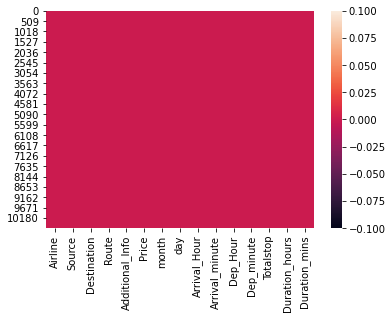

In [30]:
import seaborn as sns
sns.heatmap(df.isnull())

In [31]:
# we are checking our columns only here.
df.keys()

Index(['Airline', 'Source', 'Destination', 'Route', 'Additional_Info', 'Price',
       'month', 'day', 'Arrival_Hour', 'Arrival_minute', 'Dep_Hour',
       'Dep_minute', 'Totalstop', 'Duration_hours', 'Duration_mins'],
      dtype='object')

In [32]:
df.shape

(10683, 15)

# EDA:
ScatterPlot

<AxesSubplot:xlabel='Airline', ylabel='Price'>

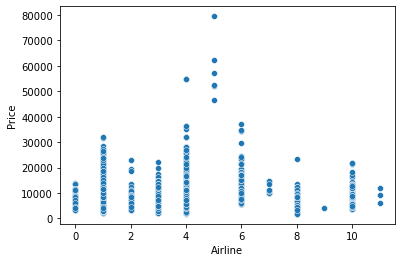

In [33]:
import seaborn as sns
sns.scatterplot(x='Airline',y='Price',data=df)

<AxesSubplot:xlabel='Source', ylabel='Price'>

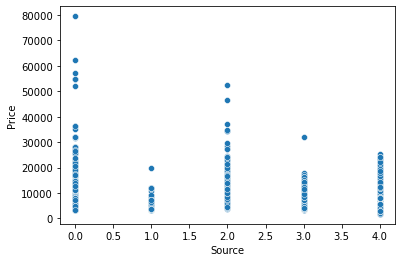

In [34]:
sns.scatterplot(x='Source',y='Price',data=df)

<AxesSubplot:xlabel='Destination', ylabel='Price'>

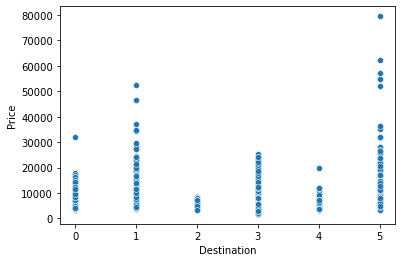

In [35]:
sns.scatterplot(x='Destination',y='Price',data=df)

<AxesSubplot:xlabel='Route', ylabel='Price'>

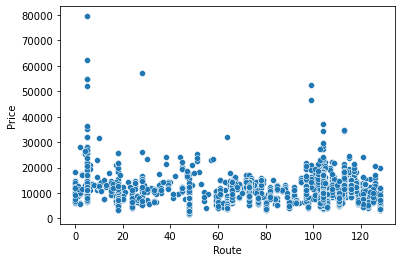

In [36]:
sns.scatterplot(x='Route',y='Price',data=df)

<AxesSubplot:xlabel='Additional_Info', ylabel='Price'>

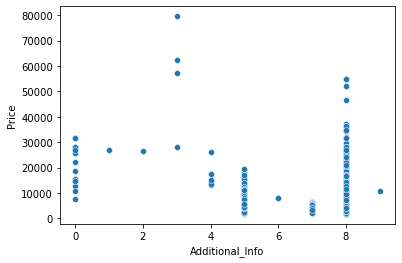

In [37]:
sns.scatterplot(x='Additional_Info',y='Price',data=df)

<AxesSubplot:xlabel='month', ylabel='Price'>

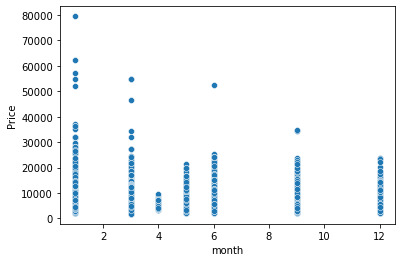

In [38]:
sns.scatterplot(x='month',y='Price',data=df)

<AxesSubplot:xlabel='day', ylabel='Price'>

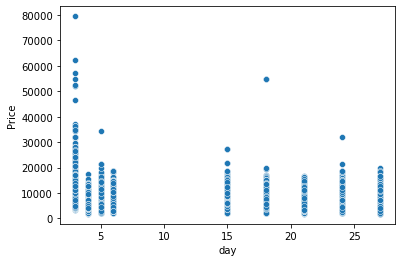

In [39]:
sns.scatterplot(x='day',y='Price',data=df)

<AxesSubplot:xlabel='Arrival_Hour', ylabel='Price'>

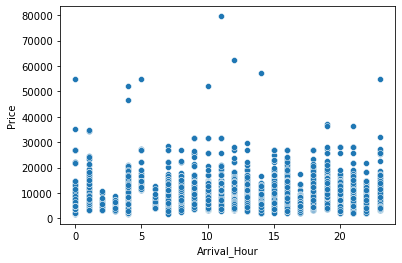

In [40]:
sns.scatterplot(x='Arrival_Hour',y='Price',data=df)

<AxesSubplot:xlabel='Arrival_minute', ylabel='Price'>

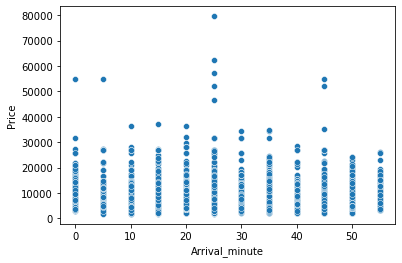

In [41]:
sns.scatterplot(x='Arrival_minute',y='Price',data=df)

<AxesSubplot:xlabel='Dep_Hour', ylabel='Price'>

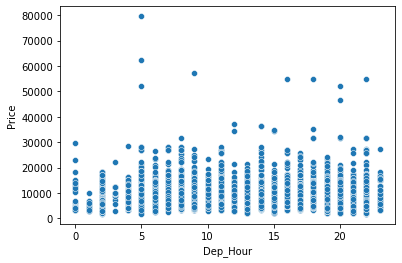

In [42]:
sns.scatterplot(x='Dep_Hour',y='Price',data=df)

<AxesSubplot:xlabel='Dep_minute', ylabel='Price'>

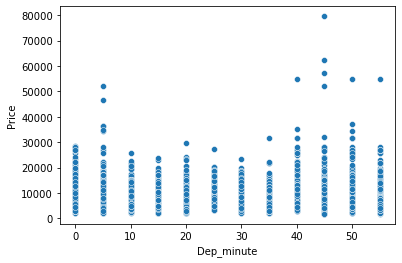

In [43]:
sns.scatterplot(x='Dep_minute',y='Price',data=df)

<AxesSubplot:xlabel='Totalstop', ylabel='Price'>

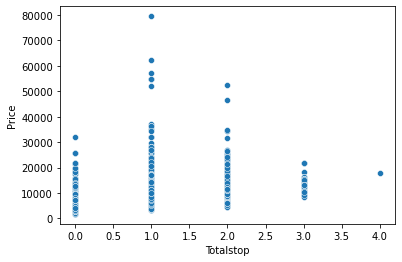

In [44]:
sns.scatterplot(x='Totalstop',y='Price',data=df)

<AxesSubplot:xlabel='Duration_hours', ylabel='Price'>

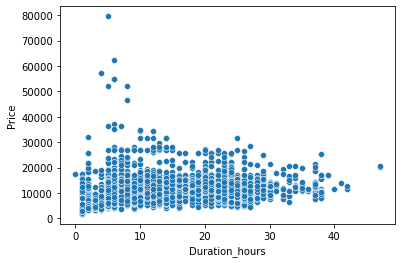

In [45]:
sns.scatterplot(x='Duration_hours',y='Price',data=df)

<AxesSubplot:xlabel='Duration_mins', ylabel='Price'>

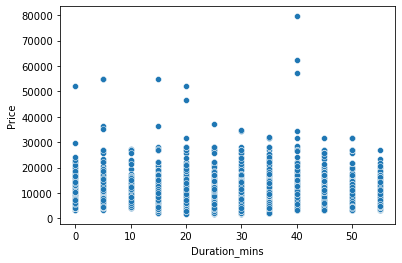

In [46]:
sns.scatterplot(x='Duration_mins',y='Price',data=df)

In [47]:
df.corr()

,Airline,Source,Destination,Route,Additional_Info,Price,month,day,Arrival_Hour,Arrival_minute,Dep_Hour,Dep_minute,Totalstop,Duration_hours,Duration_mins
Airline,1.000000,-0.013401,0.018479,0.025582,-0.060802,-0.039520,-0.007918,0.031218,-0.007491,-0.071089,-0.035194,-0.060044,-0.199411,-0.158285,-0.028088
Source,-0.013401,1.000000,-0.592574,0.402034,-0.022107,0.015998,0.063052,0.007560,0.025632,0.021040,0.059044,-0.056991,0.192840,0.166109,-0.145187
Destination,0.018479,-0.592574,1.000000,-0.458844,0.026806,-0.071112,-0.105039,-0.052076,-0.039710,0.017196,-0.072979,0.127892,-0.295481,-0.258459,0.061214
Route,0.025582,0.402034,-0.458844,1.000000,0.035525,0.162955,0.042076,0.096400,0.013719,-0.173246,-0.075045,-0.067482,0.453304,0.294232,-0.232484
Additional_Info,-0.060802,-0.022107,0.026806,0.035525,1.000000,-0.065478,-0.009098,-0.019456,0.026173,0.041311,-0.051010,-0.019339,-0.082426,-0.168725,0.046941
Price,-0.039520,0.015998,-0.071112,0.162955,-0.065478,1.000000,0.010700,-0.165412,0.024264,-0.086155,0.006819,-0.024492,0.603883,0.508672,-0.124874
month,-0.007918,0.063052,-0.105039,0.042076,-0.009098,0.010700,1.000000,-0.264899,-0.004338,-0.025786,0.028180,0.002152,0.065498,0.055568,-0.018587
day,0.031218,0.007560,-0.052076,0.096400,-0.019456,-0.165412,-0.264899,1.000000,-0.002124,-0.021424,-0.002251,-0.016521,-0.024156,-0.038081,-0.007764
Arrival_Hour,-0.007491,0.025632,-0.039710,0.013719,0.026173,0.024264,-0.004338,-0.002124,1.000000,-0.154362,0.005215,0.043054,0.038123,0.055180,-0.118345
Arrival_minute,-0.071089,0.021040,0.017196,-0.173246,0.041311,-0.086155,-0.025786,-0.021424,-0.154362,1.000000,0.067909,-0.017594,-0.106939,-0.074439,0.151626


In [48]:
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

<AxesSubplot:>

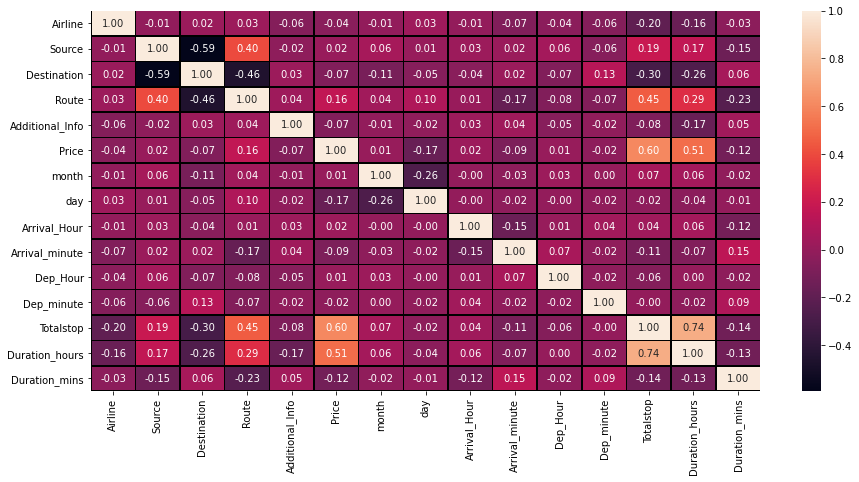

In [49]:
#Correlation using heatmap

plt.figure(figsize=(15,7))
sns.heatmap(df.corr(), annot=True, linewidth=0.5,linecolor="black", fmt='.2f')

In [50]:
#Describe Dataset
df.describe()

,Airline,Source,Destination,Route,Additional_Info,Price,month,day,Arrival_Hour,Arrival_minute,Dep_Hour,Dep_minute,Totalstop,Duration_hours,Duration_mins
count,10683.000000,10683.000000,10683.000000,10683.000000,10683.000000,10683.000000,10683.000000,10683.000000,10683.000000,10683.000000,10683.000000,10683.000000,10683.000000,10683.000000,10683.000000
mean,3.965927,1.952261,1.436113,74.860713,7.393054,9087.064121,5.534775,12.682205,13.348778,24.690630,12.490686,24.411214,0.824207,10.246092,28.327717
std,2.352155,1.177221,1.474782,36.781887,1.214211,4611.359167,2.987489,8.803701,6.859125,16.506036,5.748650,18.767980,0.675199,8.495414,16.945400
min,0.000000,0.000000,0.000000,0.000000,0.000000,1759.000000,1.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,2.000000,0.000000,48.000000,8.000000,5277.000000,3.000000,5.000000,8.000000,10.000000,8.000000,5.000000,0.000000,2.000000,15.000000
50%,4.000000,2.000000,1.000000,73.000000,8.000000,8372.000000,5.000000,6.000000,14.000000,25.000000,11.000000,25.000000,1.000000,8.000000,30.000000
75%,4.000000,3.000000,2.000000,104.000000,8.000000,12373.000000,6.000000,21.000000,19.000000,35.000000,18.000000,40.000000,1.000000,15.000000,45.000000
max,11.000000,4.000000,5.000000,128.000000,9.000000,79512.000000,12.000000,27.000000,23.000000,55.000000,23.000000,55.000000,4.000000,47.000000,55.000000


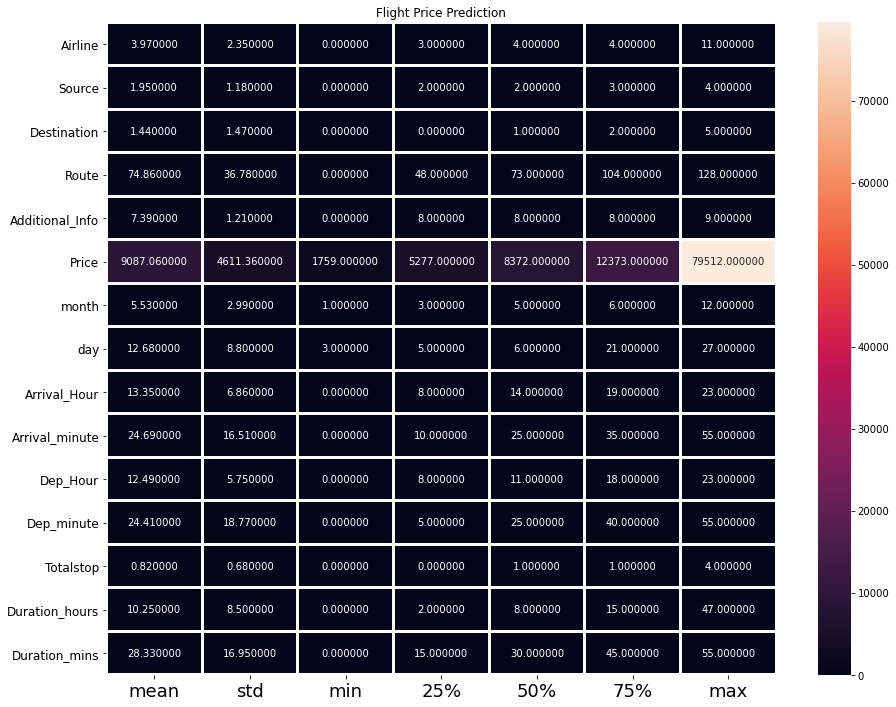

In [51]:
plt.figure(figsize=(15,12))
sns.heatmap(round(df.describe()[1:].transpose(),2),linewidth=2,annot=True,fmt="f")
plt.xticks(fontsize=18)
plt.yticks(fontsize=12)
plt.title("Flight Price Prediction")
plt.show()

In [52]:
#To check the data types  and null values also.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Airline          10683 non-null  int32
 1   Source           10683 non-null  int32
 2   Destination      10683 non-null  int32
 3   Route            10683 non-null  int32
 4   Additional_Info  10683 non-null  int32
 5   Price            10683 non-null  int64
 6   month            10683 non-null  int64
 7   day              10683 non-null  int64
 8   Arrival_Hour     10683 non-null  int32
 9   Arrival_minute   10683 non-null  int32
 10  Dep_Hour         10683 non-null  int32
 11  Dep_minute       10683 non-null  int32
 12  Totalstop        10683 non-null  int32
 13  Duration_hours   10683 non-null  int64
 14  Duration_mins    10683 non-null  int64
dtypes: int32(10), int64(5)
memory usage: 834.7 KB


<AxesSubplot:>

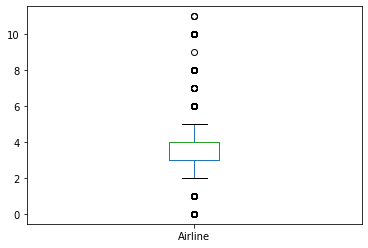

In [53]:
# we are checking outliers here.
df['Airline'].plot.box()

<AxesSubplot:>

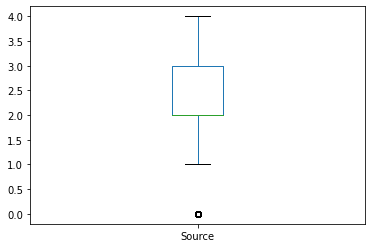

In [54]:
df['Source'].plot.box()

<AxesSubplot:>

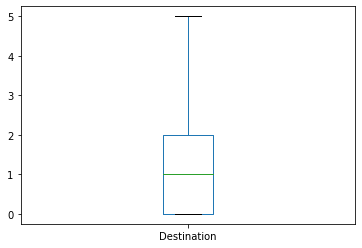

In [55]:
df['Destination'].plot.box()

<AxesSubplot:>

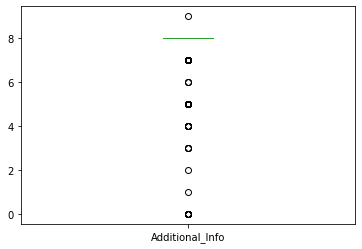

In [56]:
df['Additional_Info'].plot.box()

<AxesSubplot:>

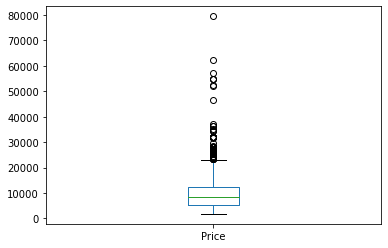

In [57]:
df['Price'].plot.box()

<AxesSubplot:>

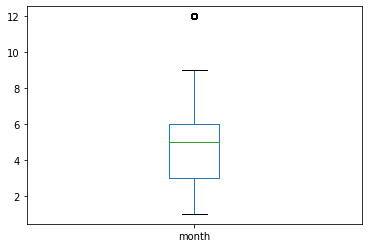

In [58]:
df['month'].plot.box()

<AxesSubplot:>

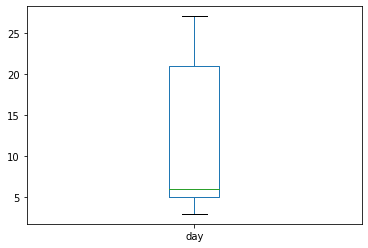

In [59]:
df['day'].plot.box()

<AxesSubplot:>

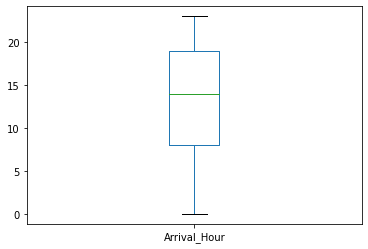

In [60]:
df['Arrival_Hour'].plot.box()

<AxesSubplot:>

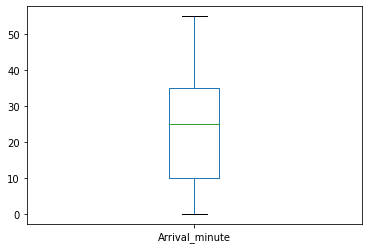

In [61]:
df['Arrival_minute'].plot.box()

<AxesSubplot:>

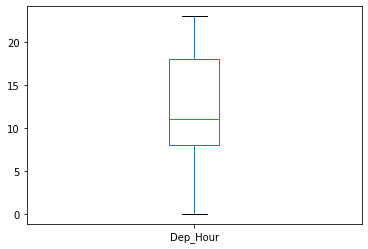

In [62]:
df['Dep_Hour'].plot.box()

<AxesSubplot:>

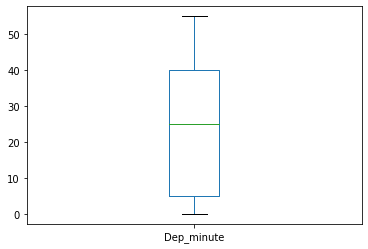

In [63]:
df['Dep_minute'].plot.box()

<AxesSubplot:>

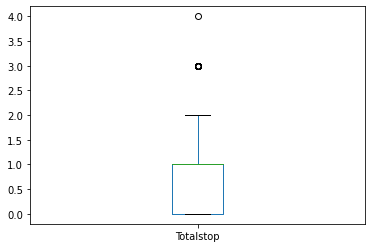

In [64]:
df['Totalstop'].plot.box()

<AxesSubplot:>

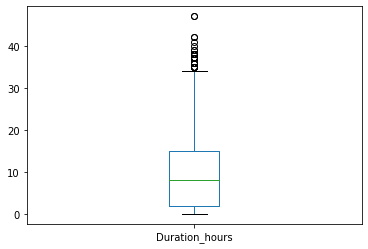

In [65]:
df['Duration_hours'].plot.box()

<AxesSubplot:>

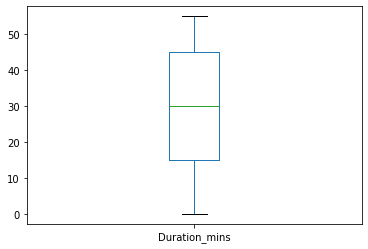

In [66]:
df['Duration_mins'].plot.box()

# Skewness:-

In [67]:
df.skew()

Airline            0.731095
Source            -0.424054
Destination        1.244169
Route             -0.496776
Additional_Info   -1.779838
Price              1.812552
month              0.629540
day                0.367373
Arrival_Hour      -0.369988
Arrival_minute     0.110945
Dep_Hour           0.113073
Dep_minute         0.167029
Totalstop          0.317049
Duration_hours     0.850862
Duration_mins     -0.090841
dtype: float64

Normal Distribution Curve

<AxesSubplot:xlabel='Airline', ylabel='Density'>

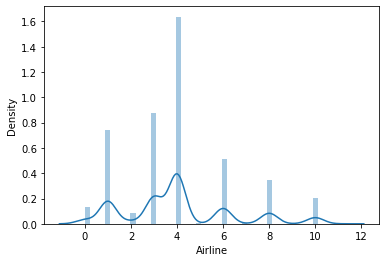

In [68]:
sns.distplot(df['Airline'])

<AxesSubplot:xlabel='Source', ylabel='Density'>

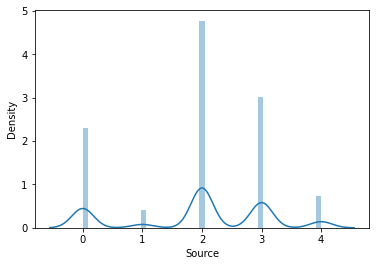

In [69]:
sns.distplot(df['Source'])

<AxesSubplot:xlabel='Destination', ylabel='Density'>

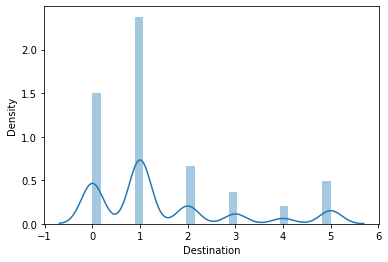

In [70]:
sns.distplot(df['Destination'])

<AxesSubplot:xlabel='Route', ylabel='Density'>

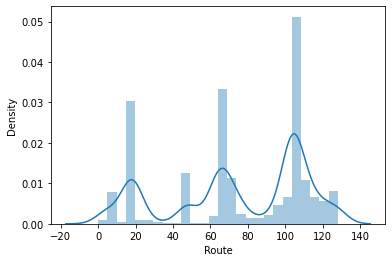

In [71]:
sns.distplot(df['Route'])

<AxesSubplot:xlabel='Additional_Info', ylabel='Density'>

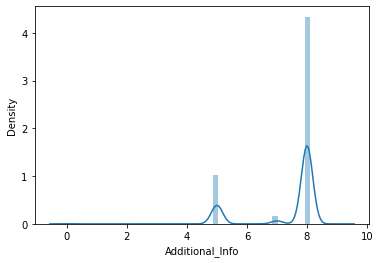

In [72]:
sns.distplot(df['Additional_Info'])

<AxesSubplot:xlabel='Price', ylabel='Density'>

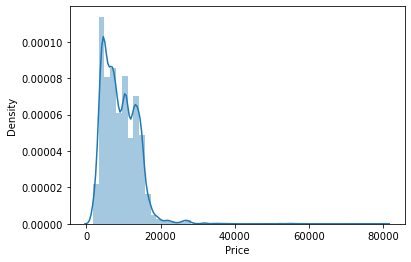

In [73]:
sns.distplot(df['Price'])

<AxesSubplot:xlabel='month', ylabel='Density'>

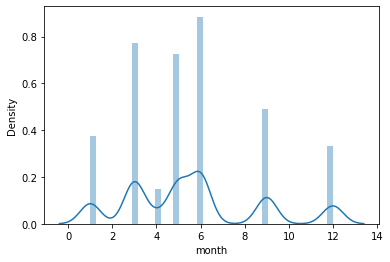

In [74]:
sns.distplot(df['month'])

<AxesSubplot:xlabel='day', ylabel='Density'>

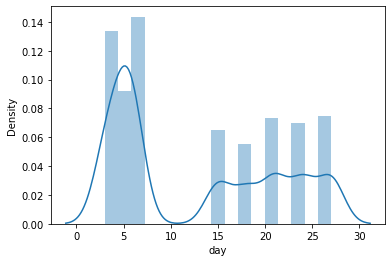

In [75]:
sns.distplot(df['day'])

<AxesSubplot:xlabel='Arrival_Hour', ylabel='Density'>

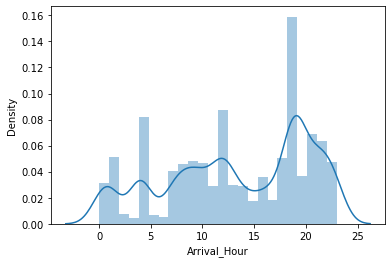

In [76]:
sns.distplot(df['Arrival_Hour'])

<AxesSubplot:xlabel='Arrival_minute', ylabel='Density'>

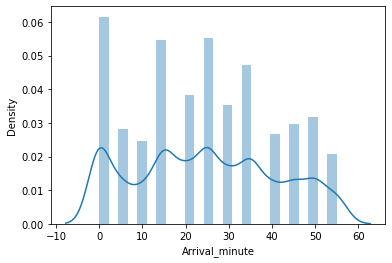

In [77]:
sns.distplot(df['Arrival_minute'])

<AxesSubplot:xlabel='Dep_Hour', ylabel='Density'>

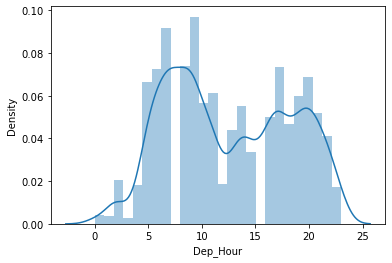

In [78]:
sns.distplot(df['Dep_Hour'])

<AxesSubplot:xlabel='Dep_minute', ylabel='Density'>

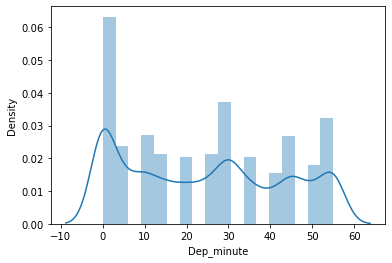

In [79]:
sns.distplot(df['Dep_minute'])

<AxesSubplot:xlabel='Totalstop', ylabel='Density'>

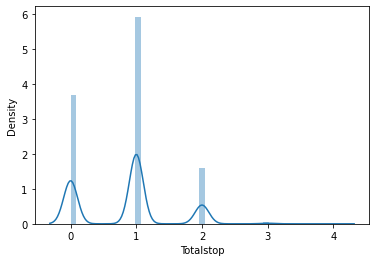

In [80]:
sns.distplot(df['Totalstop'])

<AxesSubplot:xlabel='Duration_hours', ylabel='Density'>

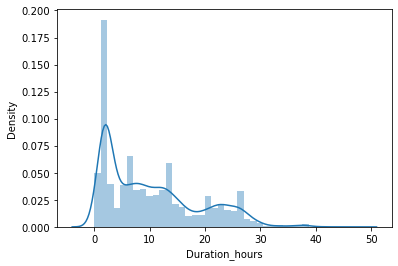

In [81]:
sns.distplot(df['Duration_hours'])

<AxesSubplot:xlabel='Duration_mins', ylabel='Density'>

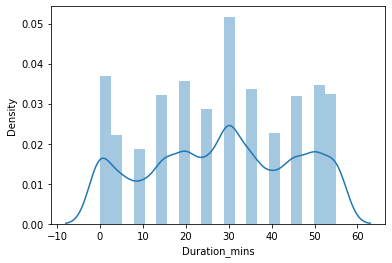

In [82]:
sns.distplot(df['Duration_mins'])

In [83]:
#*SP=skewed point.
SP = pd.DataFrame([["-0.039520","Airline","No","Alot"],["-0.124874","Duration_mins","No","Alot"],["-0.065478","Additional_Info","No","Alot"],["-0.086155","Arrival_minute","No","Alot"],["-0.024492","Dep_minute","No","Alot"]],columns=["Correlation with Target","Column Name","Normalised","Outliers"])
SP

,Correlation with Target,Column Name,Normalised,Outliers
0,-0.039520,Airline,No,Alot
1,-0.124874,Duration_mins,No,Alot
2,-0.065478,Additional_Info,No,Alot
3,-0.086155,Arrival_minute,No,Alot
4,-0.024492,Dep_minute,No,Alot


# Removing Outliers:

In [84]:
from scipy.stats import zscore
import numpy as np
z=np.abs(zscore(df))

In [85]:
threshold=3
np.where(z>3)

(array([  123,   226,   396,   402,   486,   510,   553,   597,   628,
          657,   785,   785,   826,   919,   936,   946,   959,   966,
          969,   975,  1043,  1067,  1113,  1196,  1218,  1246,  1341,
         1346,  1424,  1442,  1466,  1478,  1496,  1551,  1629,  1654,
         1657,  1665,  1785,  1791,  1804,  1918,  2055,  2079,  2099,
         2108,  2172,  2172,  2405,  2481,  2495,  2495,  2553,  2556,
         2556,  2618,  2623,  2633,  2635,  2641,  2654,  2693,  2718,
         2718,  2814,  2822,  2924,  2924,  3032,  3032,  3111,  3111,
         3157,  3220,  3257,  3317,  3400,  3457,  3496,  3535,  3568,
         3584,  3700,  3700,  3788,  3790,  3815,  3815,  3945,  3966,
         4012,  4047,  4118,  4118,  4463,  4463,  4521,  4521,  4655,
         4655,  4676,  4760,  4829,  5013,  5013,  5050,  5136,  5372,
         5372,  5439,  5446,  5516,  5628,  5662,  5701,  5701,  5710,
         5711,  5719,  5738,  5745,  5782,  5838,  5856,  5933,  5947,
      

In [86]:
df1=df[(z<3).all(axis=1)]
df1

,Airline,Source,Destination,Route,Additional_Info,Price,month,day,Arrival_Hour,Arrival_minute,Dep_Hour,Dep_minute,Totalstop,Duration_hours,Duration_mins
0,3,0,5,18,8,3897,3,24,1,10,22,20,0,2,50
1,1,3,0,84,8,7662,1,5,13,15,5,50,2,7,25
2,4,2,1,118,8,13882,9,6,4,25,9,25,2,19,0
3,3,3,0,91,8,6218,12,5,23,30,18,5,1,5,25
4,3,0,5,29,8,13302,1,3,21,35,16,50,1,4,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,0,3,0,64,8,4107,9,4,22,25,19,55,0,2,30
10679,1,3,0,64,8,4145,4,27,23,20,20,45,0,2,35
10680,4,0,2,18,8,7229,4,27,11,20,8,20,0,3,0
10681,10,0,5,18,8,12648,1,3,14,10,11,30,0,2,40


In [87]:
# Here we can check shape both of the dataset.
df.shape,df1.shape

((10683, 15), (10480, 15))

# Percentage loss of data while removing ourliers

In [91]:
percentage_loss=((10683-10480)/10683)*100
print(percentage_loss)

1.9002152953290274


we can proceed with the outliers removable

In [92]:
x = df1[['Airline', 'Source', 'Destination', 'Route', 'Additional_Info',
       'month', 'day', 'Arrival_Hour', 'Arrival_minute', 'Dep_Hour',
       'Dep_minute', 'Totalstop', 'Duration_hours', 'Duration_mins']]
y = df1['Price']

In [93]:
# Here we can check our seperation of our data in 2 variable x and y.
x

,Airline,Source,Destination,Route,Additional_Info,month,day,Arrival_Hour,Arrival_minute,Dep_Hour,Dep_minute,Totalstop,Duration_hours,Duration_mins
0,3,0,5,18,8,3,24,1,10,22,20,0,2,50
1,1,3,0,84,8,1,5,13,15,5,50,2,7,25
2,4,2,1,118,8,9,6,4,25,9,25,2,19,0
3,3,3,0,91,8,12,5,23,30,18,5,1,5,25
4,3,0,5,29,8,1,3,21,35,16,50,1,4,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,0,3,0,64,8,9,4,22,25,19,55,0,2,30
10679,1,3,0,64,8,4,27,23,20,20,45,0,2,35
10680,4,0,2,18,8,4,27,11,20,8,20,0,3,0
10681,10,0,5,18,8,1,3,14,10,11,30,0,2,40


In [94]:
y

0         3897
1         7662
2        13882
3         6218
4        13302
         ...  
10678     4107
10679     4145
10680     7229
10681    12648
10682    11753
Name: Price, Length: 10480, dtype: int64

# Transforming data to remove skewness.

In [95]:
from sklearn.preprocessing import power_transform
x=power_transform(x,method='yeo-johnson')
x

array([[-0.30557359, -1.61277964,  1.77801788, ..., -1.28705967,
        -1.16466051,  1.19466174],
       [-1.42860962,  0.8949498 , -1.36389231, ...,  1.639405  ,
        -0.03606181, -0.10615968],
       [ 0.13780307, -0.02737949,  0.02095373, ...,  1.639405  ,
         1.10337931, -1.87819203],
       ...,
       [ 0.13780307, -1.61277964,  0.72632107, ..., -1.28705967,
        -0.84297654, -1.87819203],
       [ 2.11795108, -1.61277964,  1.77801788, ..., -1.28705967,
        -1.16466051,  0.69809766],
       [-1.42860962, -0.02737949,  0.02095373, ...,  1.639405  ,
         0.10566278, -0.39708241]])

In [96]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(x)
x

array([[-0.30557359, -1.61277964,  1.77801788, ..., -1.28705967,
        -1.16466051,  1.19466174],
       [-1.42860962,  0.8949498 , -1.36389231, ...,  1.639405  ,
        -0.03606181, -0.10615968],
       [ 0.13780307, -0.02737949,  0.02095373, ...,  1.639405  ,
         1.10337931, -1.87819203],
       ...,
       [ 0.13780307, -1.61277964,  0.72632107, ..., -1.28705967,
        -0.84297654, -1.87819203],
       [ 2.11795108, -1.61277964,  1.77801788, ..., -1.28705967,
        -1.16466051,  0.69809766],
       [-1.42860962, -0.02737949,  0.02095373, ...,  1.639405  ,
         0.10566278, -0.39708241]])

Since the outcome has only two variable we will use binary classification model.

# Splitting the dataframe:

In [97]:
from sklearn.preprocessing import MinMaxScaler
mms=MinMaxScaler()
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [98]:
# Here we are splitting our data in training and testing.
for i in range(0,1000):
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=i,test_size=0.20)
    lr.fit(x_train,y_train)
    pred_train=lr.predict(x_train)
    pred_test=lr.predict(x_test)
    print(f"At random state {i}, the training accuracy is:- {r2_score(y_train,pred_train)}")
    print(f"At random state {i}, the testing accuracy is:- {r2_score(y_test,pred_test)}")
    print("\n")

At random state 0, the training accuracy is:- 0.5522960260904068
At random state 0, the testing accuracy is:- 0.5481657022939288


At random state 1, the training accuracy is:- 0.5484660068791964
At random state 1, the testing accuracy is:- 0.5637764096839284


At random state 2, the training accuracy is:- 0.554375019397964
At random state 2, the testing accuracy is:- 0.5391908749292722


At random state 3, the training accuracy is:- 0.5535768104185115
At random state 3, the testing accuracy is:- 0.5434733086187161


At random state 4, the training accuracy is:- 0.5490598748455349
At random state 4, the testing accuracy is:- 0.5609211750582233


At random state 5, the training accuracy is:- 0.5556661688988737
At random state 5, the testing accuracy is:- 0.5357516454294584


At random state 6, the training accuracy is:- 0.5551723392510748
At random state 6, the testing accuracy is:- 0.5372301694239401


At random state 7, the training accuracy is:- 0.550920335600408
At random state 7, t

In [99]:
x_train,y_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=3)

# Approaching Regularization:

In [100]:
from sklearn.linear_model import Ridge,Lasso,ElasticNet
from sklearn.metrics import r2_score

rdg=Ridge(alpha=.0001,random_state=2)
rdg.fit(x_train,y_train)
rdg.score(x_train,y_train)

0.5535768104185115

In [101]:
predict=rdg.predict(x_test)

In [102]:
r2_score(y_test,predict)

-0.5431259823225392

In [103]:
# Importing feature using ExtraTreesRegressor

from sklearn.ensemble import ExtraTreesRegressor
selection = ExtraTreesRegressor()
selection.fit(x,y)

ExtraTreesRegressor()

In [104]:
print(selection.feature_importances_)

[0.1334395  0.0117755  0.01911047 0.04559062 0.03915874 0.0418699
 0.09180503 0.02161881 0.01614689 0.01933567 0.01958191 0.33781133
 0.18854342 0.01421222]


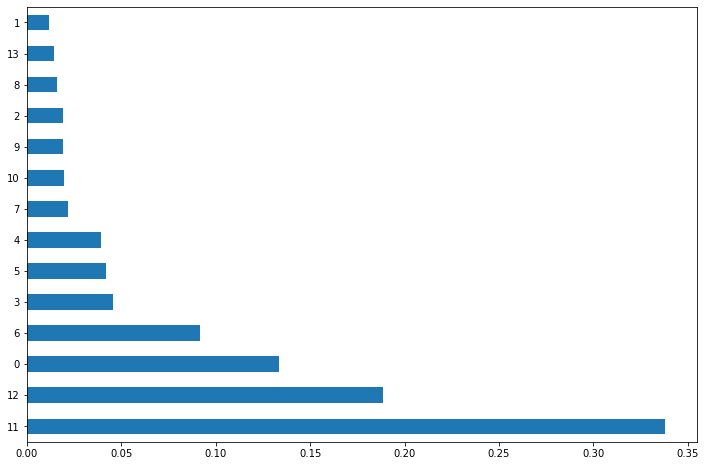

In [105]:
# plot graph of feature importances for better visualization

plt.figure(figsize = (12,8))
feat_importances = pd.Series(selection.feature_importances_,)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()

# Fitting model using Random Forest

In [106]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.20, random_state = 0)

In [107]:
from sklearn.ensemble import RandomForestRegressor
reg_rf = RandomForestRegressor()
reg_rf.fit(x_train, y_train)

RandomForestRegressor()

In [108]:
y_pred = reg_rf.predict(x_test)

In [109]:
reg_rf.score(x_train,y_train)

0.9874957922358633

In [110]:
reg_rf.score(x_test,y_test)

0.9229800047759567

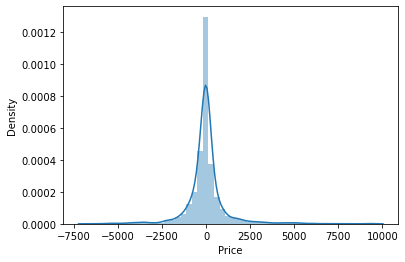

In [111]:
sns.distplot(y_test-y_pred)
plt.show()

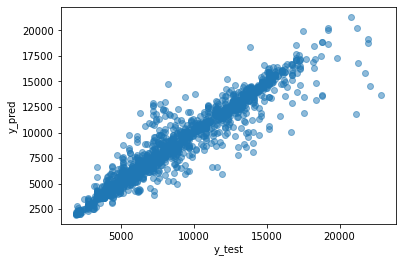

In [112]:
plt.scatter(y_test,y_pred,alpha=0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

In [113]:
from sklearn import metrics

In [114]:
print('MAE', metrics.mean_absolute_error(y_test, y_pred))
print('MSE', metrics.mean_squared_error(y_test, y_pred))
print('RMSE', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE 582.3177436348903
MSE 1248159.9847736408
RMSE 1117.2108058793742


In [115]:
metrics.r2_score(y_test,y_pred)

0.9229800047759567

# Hyperparameter Tuning

we will use for hyperparameter tuning
1. RandomizedSEarchCV
2. GridSearchCV

assign hyperparameters in form of dictionery
fit the mode
check best parameters and best score

In [116]:
from sklearn.model_selection import RandomizedSearchCV

In [117]:
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
max_features = ['auto','sqrt']
max_depth = [int(x) for x in np.linspace(5,30,num = 6)]
min_samples_split = [2, 5, 10, 15, 100]
min_samples_leaf = [1, 2, 5, 10]

In [118]:
# create the random grid

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

In [119]:
rf_random = RandomizedSearchCV(estimator = reg_rf, param_distributions = random_grid,scoring ='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)

In [120]:
rf_random.fit(x_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=  12.7s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=  12.4s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=  14.1s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=  14.9s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=  13.6s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=  20.1s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=  18.4s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimator

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [121]:
rf_random.best_params_

{'n_estimators': 700,
 'min_samples_split': 15,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 20}

In [122]:
pred = rf_random.predict(x_test)

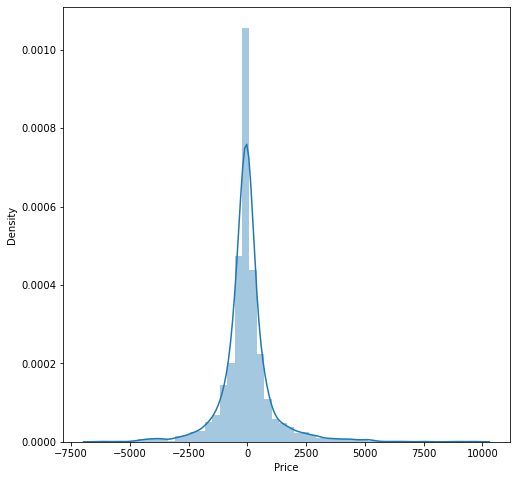

In [123]:
plt.figure(figsize = (8,8))
sns.distplot(y_test-pred)
plt.show()

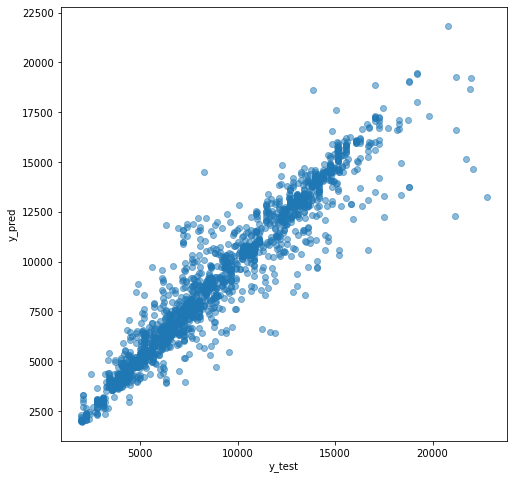

In [124]:
plt.figure(figsize = (8,8))
plt.scatter(y_test,pred, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

In [125]:
print('MAE', metrics.mean_absolute_error(y_test, y_pred))
print('MSE', metrics.mean_squared_error(y_test, y_pred))
print('RMSE', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE 582.3177436348903
MSE 1248159.9847736408
RMSE 1117.2108058793742


# Save the model:-

In [126]:
import pickle
# open a file, where you to store the data
file = open('flight_rf.pkl','wb')

# dump information to that file
pickle.dump(rf_random, file)

In [127]:
model = open('flight_rf.pkl','rb')
forest = pickle.load(model)

In [128]:
y_prediction = forest.predict(x_test)

In [129]:
metrics.r2_score(y_test, y_prediction)

0.9217098135883195

# TEST_DATA :-We are Starting do analysis on test_data  from here.

In [193]:
test_data  = pd.read_excel("Test_set.xlsx")
test_data

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info
...,...,...,...,...,...,...,...,...,...,...
2666,Air India,6/06/2019,Kolkata,Banglore,CCU → DEL → BLR,20:30,20:25 07 Jun,23h 55m,1 stop,No info
2667,IndiGo,27/03/2019,Kolkata,Banglore,CCU → BLR,14:20,16:55,2h 35m,non-stop,No info
2668,Jet Airways,6/03/2019,Delhi,Cochin,DEL → BOM → COK,21:50,04:25 07 Mar,6h 35m,1 stop,No info
2669,Air India,6/03/2019,Delhi,Cochin,DEL → BOM → COK,04:00,19:15,15h 15m,1 stop,No info


In [194]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2671 entries, 0 to 2670
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          2671 non-null   object
 1   Date_of_Journey  2671 non-null   object
 2   Source           2671 non-null   object
 3   Destination      2671 non-null   object
 4   Route            2671 non-null   object
 5   Dep_Time         2671 non-null   object
 6   Arrival_Time     2671 non-null   object
 7   Duration         2671 non-null   object
 8   Total_Stops      2671 non-null   object
 9   Additional_Info  2671 non-null   object
dtypes: object(10)
memory usage: 208.8+ KB


In [196]:
# Preprocessing

print("Test data Info")
print("-"*75)
print(test_data.info())

print()
print()

print("Null values :")
print("-"*75)
test_data.dropna(inplace = True)
print(test_data.isnull().sum())

# EDA

# Date_of_Journey
test_data["Journey_day"] = pd.to_datetime(test_data.Date_of_Journey, format="%d/%m/%Y").dt.day
test_data["Journey_month"] = pd.to_datetime(test_data["Date_of_Journey"], format = "%d/%m/%Y").dt.month
test_data.drop(["Date_of_Journey"], axis = 1, inplace = True)

# Dep_Time
test_data["Dep_hour"] = pd.to_datetime(test_data["Dep_Time"]).dt.hour
test_data["Dep_min"] = pd.to_datetime(test_data["Dep_Time"]).dt.minute
test_data.drop(["Dep_Time"], axis = 1, inplace = True)

# Arrival_Time
test_data["Arrival_hour"] = pd.to_datetime(test_data.Arrival_Time).dt.hour
test_data["Arrival_min"] = pd.to_datetime(test_data.Arrival_Time).dt.minute
test_data.drop(["Arrival_Time"], axis = 1, inplace = True)

# Duration
duration = list(test_data["Duration"])

for i in range(len(duration)):
    if len(duration[i].split()) != 2:    # Check if duration contains only hour or mins
        if "h" in duration[i]:
            duration[i] = duration[i].strip() + " 0m"   # Adds 0 minute
        else:
            duration[i] = "0h " + duration[i]           # Adds 0 hour

duration_hours = []
duration_mins = []
for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep = "h")[0]))    # Extract hours from duration
    duration_mins.append(int(duration[i].split(sep = "m")[0].split()[-1]))   # Extracts only minutes from duration

# Adding Duration column to test set
test_data["Duration_hours"] = duration_hours
test_data["Duration_mins"] = duration_mins
test_data.drop(["Duration"], axis = 1, inplace = True)


# Categorical data

print("Airline")
print("-"*75)
print(test_data["Airline"].value_counts())
Airline = pd.get_dummies(test_data["Airline"], drop_first= True)

print()

print("Source")
print("-"*75)
print(test_data["Source"].value_counts())
Source = pd.get_dummies(test_data["Source"], drop_first= True)

print()

print("Destination")
print("-"*75)
print(test_data["Destination"].value_counts())
Destination = pd.get_dummies(test_data["Destination"], drop_first = True)

# Additional_Info contains almost 80% no_info
# Route and Total_Stops are related to each other
test_data.drop(["Route", "Additional_Info"], axis = 1, inplace = True)

# Replacing Total_Stops
test_data.replace({"non-stop": 0, "1 stop": 1, "2 stops": 2, "3 stops": 3, "4 stops": 4}, inplace = True)

# Concatenate dataframe --> test_data + Airline + Source + Destination
data_test = pd.concat([test_data, Airline, Source, Destination], axis = 1)

data_test.drop(["Airline", "Source", "Destination"], axis = 1, inplace = True)

print()
print()

print("Shape of test data : ", data_test.shape)

Test data Info
---------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2671 entries, 0 to 2670
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Airline          2671 non-null   object        
 1   Date_of_Journey  2671 non-null   datetime64[ns]
 2   Source           2671 non-null   object        
 3   Destination      2671 non-null   object        
 4   Route            2671 non-null   object        
 5   Dep_Time         2671 non-null   object        
 6   Arrival_Time     2671 non-null   object        
 7   Duration         2671 non-null   object        
 8   Total_Stops      2671 non-null   object        
 9   Additional_Info  2671 non-null   object        
dtypes: datetime64[ns](1), object(9)
memory usage: 208.8+ KB
None


Null values :
---------------------------------------------------------------------------
Airline 

In [197]:
data_test.head()

,Total_Stops,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins,Air India,...,Vistara Premium economy,Chennai,Delhi,Kolkata,Mumbai,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
0,1,6,6,17,30,4,25,10,55,0,...,0,0,1,0,0,1,0,0,0,0
1,1,5,12,6,20,10,20,4,0,0,...,0,0,0,1,0,0,0,0,0,0
2,1,21,5,19,15,19,0,23,45,0,...,0,0,1,0,0,1,0,0,0,0
3,1,21,5,8,0,21,0,13,0,0,...,0,0,1,0,0,1,0,0,0,0
4,0,24,6,23,55,2,45,2,50,0,...,0,0,0,0,0,0,1,0,0,0


# Feature Selection
Finding out the best feature which will contribute and have good relation with target variable. Following are some of the feature selection methods,

**heatmap**

**feature_importance_**

**SelectKBest**

In [200]:
df1.shape

(10480, 15)

In [201]:
df1.columns

Index(['Airline', 'Source', 'Destination', 'Route', 'Additional_Info', 'Price',
       'month', 'day', 'Arrival_Hour', 'Arrival_minute', 'Dep_Hour',
       'Dep_minute', 'Totalstop', 'Duration_hours', 'Duration_mins'],
      dtype='object')

In [202]:
x = df1.loc[:, ['Airline', 'Source', 'Destination', 'Route', 'Additional_Info', 'Price',
       'month', 'day', 'Arrival_Hour', 'Arrival_minute', 'Dep_Hour',
       'Dep_minute', 'Totalstop', 'Duration_hours', 'Duration_mins']]
x.head()

,Airline,Source,Destination,Route,Additional_Info,Price,month,day,Arrival_Hour,Arrival_minute,Dep_Hour,Dep_minute,Totalstop,Duration_hours,Duration_mins
0,3,0,5,18,8,3897,3,24,1,10,22,20,0,2,50
1,1,3,0,84,8,7662,1,5,13,15,5,50,2,7,25
2,4,2,1,118,8,13882,9,6,4,25,9,25,2,19,0
3,3,3,0,91,8,6218,12,5,23,30,18,5,1,5,25
4,3,0,5,29,8,13302,1,3,21,35,16,50,1,4,45


In [203]:
y = df1.iloc[:, 1]
y.head()

0    0
1    3
2    2
3    3
4    0
Name: Source, dtype: int32

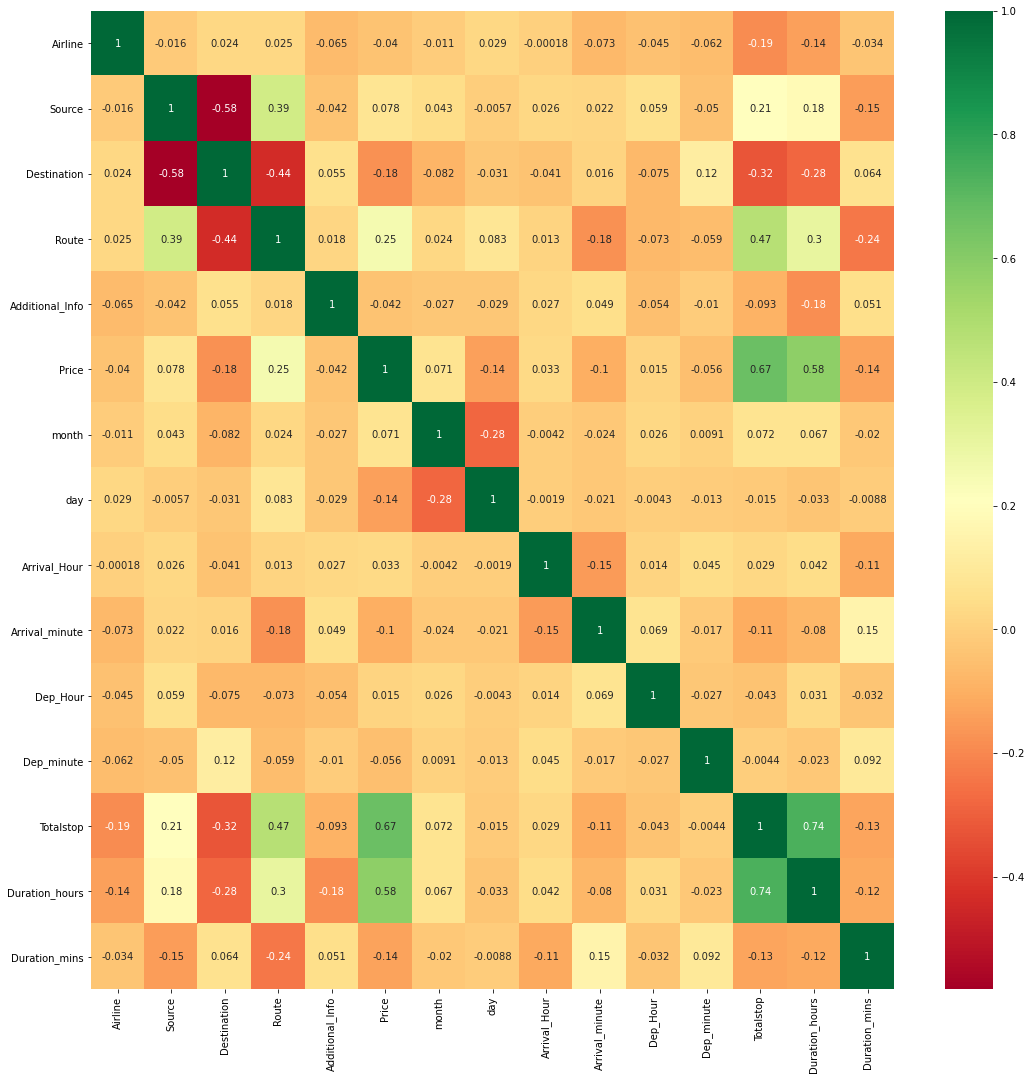

In [205]:
# Finds correlation between Independent and dependent attributes

plt.figure(figsize = (18,18))
sns.heatmap(df1.corr(), annot = True, cmap = "RdYlGn")

plt.show()

In [206]:
# Important feature using ExtraTreesRegressor

from sklearn.ensemble import ExtraTreesRegressor
selection = ExtraTreesRegressor()
selection.fit(x, y)

ExtraTreesRegressor()

In [207]:
print(selection.feature_importances_)

[0.         0.76816922 0.10244369 0.12320794 0.         0.
 0.         0.         0.         0.         0.         0.
 0.00090519 0.00527396 0.        ]


In [212]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [213]:
from sklearn.ensemble import RandomForestRegressor
reg_rf = RandomForestRegressor()
reg_rf.fit(x_train, y_train)

RandomForestRegressor()

In [215]:
y_pred = reg_rf.predict(x_test)

In [216]:
reg_rf.score(x_train, y_train)

1.0

In [217]:
reg_rf.score(x_test, y_test)

1.0

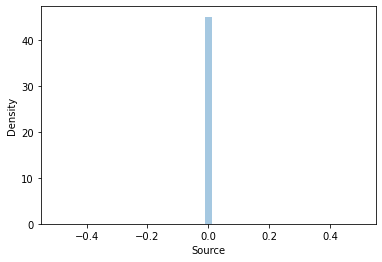

In [218]:
sns.distplot(y_test-y_pred)
plt.show()

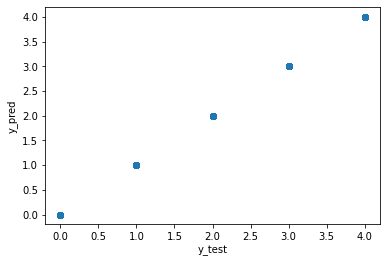

In [219]:
plt.scatter(y_test, y_pred, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

In [220]:
from sklearn import metrics

In [223]:
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 0.0
MSE: 0.0
RMSE: 0.0


In [224]:
# RMSE/(max(DV)-min(DV))

2090.5509/(max(y)-min(y))

522.637725

In [225]:
metrics.r2_score(y_test, y_pred)

1.0

# Hyperparameter Tuning
Choose following method for hyperparameter tuning
RandomizedSearchCV --> Fast


GridSearchCV
Assign hyperparameters in form of dictionery
Fit the model
Check best paramters and best score

In [226]:
from sklearn.model_selection import RandomizedSearchCV

In [228]:
#Randomized Search CV

n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
min_samples_split = [2, 5, 10, 15, 100]
min_samples_leaf = [1, 2, 5, 10]

In [229]:
# Create the random grid

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

In [230]:
# Random search of parameters, using 5 fold cross validation, 
# search across 100 different combinations
rf_random = RandomizedSearchCV(estimator = reg_rf, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)

In [232]:
rf_random.fit(x_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=  10.5s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   8.5s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   9.0s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   9.6s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   9.8s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=  11.6s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=  10.8s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimator

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [233]:
rf_random.best_params_

{'n_estimators': 300,
 'min_samples_split': 100,
 'min_samples_leaf': 5,
 'max_features': 'auto',
 'max_depth': 15}

In [234]:
prediction = rf_random.predict(x_test)

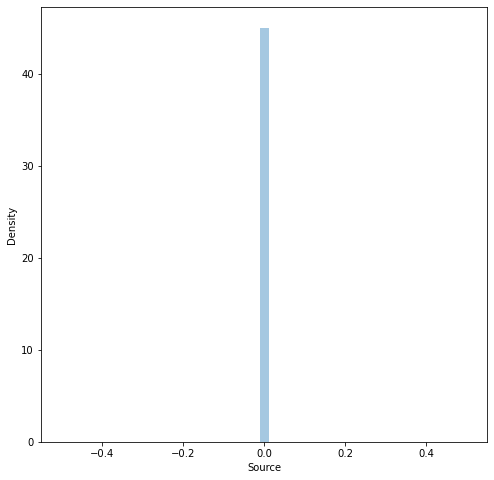

In [235]:
plt.figure(figsize = (8,8))
sns.distplot(y_test-prediction)
plt.show()

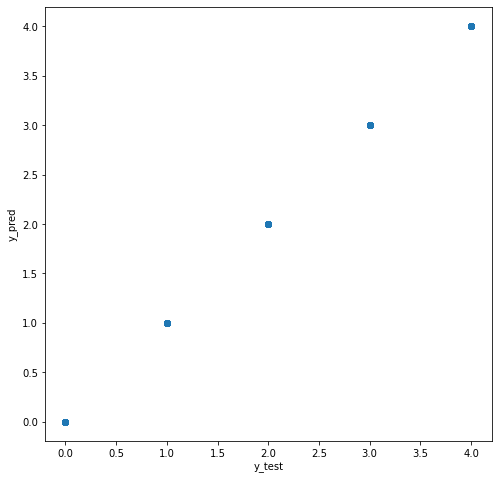

In [236]:
plt.figure(figsize = (8,8))
plt.scatter(y_test, prediction, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

In [237]:
print('MAE:', metrics.mean_absolute_error(y_test, prediction))
print('MSE:', metrics.mean_squared_error(y_test, prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))

MAE: 0.0
MSE: 0.0
RMSE: 0.0


# Save the model:-

In [238]:
import pickle
# open a file, where you ant to store the data
file = open('flight_rf.pkl', 'wb')

# dump information to that file
pickle.dump(reg_rf, file)

In [240]:
model = open('flight_rf.pkl','rb')
forest = pickle.load(model)

In [241]:
y_prediction = forest.predict(x_test)

In [242]:
metrics.r2_score(y_test, y_prediction)

1.0

Our best metrics.r2_score is 100%.